# Reto: Entregable #2
## Reto Selección, configuración y entrenamiento del modelo

| Integrantes        | Matricula            |
|---------------|---------------|
| Ana Lucía Cárdenas Pérez      | A01284090          |
| Elías Garza Valdés      | A01284041          |
| Diego Elián Rodríguez Cantú      | A00829925          |
| José Edmundo Romo Castillo           | A01197772           |


### Variables 

En el análisis de datos y la construcción de modelos predictivos, es común realizar una limpieza exhaustiva de los conjuntos de datos para garantizar que solo las variables más relevantes y significativas sean consideradas. En el caso del dataset del Titanic, que contiene información sobre pasajeros a bordo del famoso barco, la selección de variables es fundamental para garantizar la precisión y la interpretabilidad de los resultados. Aquí se explica por qué se eliminaron algunas variables y por qué se retuvieron las mencionadas:

1. **Name y PassengerId**: Estas variables son identificadores únicos y no aportan información relevante para predecir la supervivencia de un pasajero. No influyen en el resultado y, por lo tanto, se eliminan para evitar ruido innecesario en el modelo.

2. **Ticket**: El número de ticket no tiene una relación clara con la supervivencia y, en general, no aporta información significativa para el análisis. Por lo tanto, se excluye para simplificar el dataset.

3. **Cabin**: Aunque la ubicación de la cabina podría tener algún impacto en la supervivencia, la gran cantidad de valores faltantes y la complejidad de interpretación hacen que esta variable sea difícil de utilizar de manera efectiva. Por esta razón, a menudo se opta por omitir esta variable en el análisis inicial.

4. **Fare**: Aunque el precio del boleto (tarifa) podría estar relacionado con la clase del pasajero y, por lo tanto, con la supervivencia, gran parte de esta información ya está capturada por la variable "Pclass". Además, la información sobre la tarifa puede ser redundante o no aportar suficiente poder predictivo, por lo que se excluye en este caso.

5. **Sex y Embarked**: Estas variables se transforman en variables dummy ("is_male", "Embarked_C", "Embarked_Q", "Embarked_S") para representarlas de manera numérica. Esto se hace para que el modelo pueda trabajar con ellas. La variable "Sex" se transforma en "is_male" para que el modelo trate el género como una variable binaria (1 para masculino, 0 para femenino). La variable "Embarked" indica el puerto de embarque y se descompone en tres variables dummy para representar cada puerto por separado.

Las variables que se seleccionaron ("Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S", "is_male") se eligieron en función de su potencial para influir en la supervivencia de los pasajeros y su capacidad para aportar información significativa al modelo. Las demás variables se eliminan debido a su falta de relevancia o a la dificultad de interpretación. Esta selección cuidadosa de variables contribuye a la creación de un modelo más eficiente y efectivo para predecir la supervivencia de los pasajeros del Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Model')
from SVM_titanic import titanic_svm
from GaussianNB import titanic_gnb
from Random_Forest import titanic_rf
from logistic import titanic_log
from sklearn.model_selection import train_test_split

import random
random.seed(0)

Para predecir la supervivencia de un pasajero en el Titanic, estamos ante un problema de clasificación binaria, donde cada pasajero se etiqueta como "sobrevivió" (1) o "no sobrevivió" (0). Dado que la base de datos ya está limpia y contiene variables como "Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S" y "is_male", tenemos un conjunto de datos que combina variables numéricas y categóricas codificadas en formato numérico o binario.

Vamos a analizar cómo estas variables se ajustan a los siguientes modelos de clasificación: Regresión Logística, Random Forest, Support Vector Machine (SVM) y Gaussian Naive Bayes.

1. **Regresión Logística**:
   - **Compatibilidad con datos**: La regresión logística es adecuada para datos que contienen variables numéricas y categóricas. Puede manejar variables binarias (como "is_male") y variables continuas (como "Age").
   - **Ventajas**: Es un modelo simple e interpretable. Ofrece probabilidades de clasificación. Funciona bien cuando las clases son linealmente separables.
   - **Desventajas**: Puede no funcionar bien si las relaciones son altamente no lineales. No captura interacciones complejas entre características.

2. **Random Forest**:
   - **Compatibilidad con datos**: Los Random Forests son versátiles y pueden manejar una combinación de características numéricas y categóricas.
   - **Ventajas**: Pueden manejar relaciones no lineales. Son robustos frente a overfitting. Pueden manejar variables irrelevantes.
   - **Desventajas**: Pueden ser más difíciles de interpretar que modelos simples. Pueden sobreajustar en conjuntos de datos pequeños.

3. **Support Vector Machine (SVM)**:
   - **Compatibilidad con datos**: Los SVM pueden manejar tanto características numéricas como categóricas codificadas.
   - **Ventajas**: Pueden manejar relaciones no lineales utilizando el truco del kernel. Son eficaces en espacios de alta dimensión. Buen rendimiento en problemas con separación clara.
   - **Desventajas**: Puede ser computacionalmente costoso en conjuntos de datos grandes. La selección del kernel y los parámetros puede ser un desafío.

4. **Gaussian Naive Bayes**:
   - **Compatibilidad con datos**: El Naive Bayes es adecuado para características numéricas y categóricas. La asunción de independencia condicional entre características puede ser cuestionable en ciertos casos.
   - **Ventajas**: Simple y rápido. Puede funcionar bien incluso con supuestos incumplidos. Bueno para datos pequeños.
   - **Desventajas**: Supone independencia condicional, lo que puede no ser cierto en la realidad. No captura interacciones entre características.

En resumen, todas las variables seleccionadas ("Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S", "is_male") son compatibles con los modelos de clasificación mencionados. La elección del modelo dependerá de la naturaleza de los datos y de la complejidad de las relaciones entre las características. La Regresión Logística es una buena opción inicial debido a su simplicidad y interpretabilidad. Los Random Forests son adecuados para relaciones no lineales y para evitar overfitting. Los SVM son útiles cuando las clases están bien separadas. El Naive Bayes es una opción simple que funciona bien en casos con pocos datos. La selección del modelo debe considerar tanto el rendimiento predictivo como la interpretabilidad de los resultados.

Para evaluar y comparar el rendimiento de los modelos, se realizará un proceso de ajuste de hiperparámetros utilizando diferentes configuraciones para cada uno. En particular, se variarán los siguientes parámetros de los modelos:

1. **Random Forest**:
   Se ajustará el parámetro `max_depth`, que controla la profundidad máxima de los árboles en el bosque. Al modificar este valor, se puede controlar la complejidad de los árboles y, por lo tanto, el potencial de overfitting.

2. **Support Vector Machine (SVM)**:
   Se variará el parámetro `kernel`, que determina el tipo de función kernel utilizada para transformar los datos en un espacio de mayor dimensión. Las opciones comunes son lineal, polinómica y radial (RBF). Además, se podría ajustar el grado (`degree`) en caso de usar un kernel polinómico, que controla la complejidad de las transformaciones polinómicas.

Al comparar las diferentes configuraciones de hiperparámetros para cada modelo, se busca identificar cuál es el conjunto de parámetros que produce el mejor rendimiento en la predicción de la supervivencia de los pasajeros del Titanic. Este proceso es fundamental para asegurarse de que los modelos estén optimizados y puedan generalizar bien a datos nuevos y no vistos durante el entrenamiento.

### Leyendo los datos

In [2]:
train = pd.read_csv(r'..\Data\\train_clean.csv')
train = train.drop(columns = [train.columns[0]])
y = train.Survived  
X  = train.drop(columns = "Survived")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False) # 70% training and 30% test


### Support Vector Machine

Para el modelo de SVM usaremos distintos kernels y distintos grados para el kernel polinomial.

Los kernels en SVM son funciones que transforman los datos originales en un espacio de mayor dimensión donde las clases sean más fácilmente separables. Diferentes kernels representan diferentes formas de separación de clases y pueden capturar relaciones más complejas entre los datos. Los kernels comunes incluyen:
- **Linear Kernel**: Para separaciones lineales.
- **RBF Kernel**: Para separaciones no lineales y complejas.
- **Polynomial Kernel**: Para relaciones polinómicas de grado superior.

El objetivo de probar diferentes kernels es identificar cuál de ellos se ajusta mejor a la naturaleza de los datos y produce una mejor separación de las clases. Al probar varios kernels, podemos entender cómo cada uno se adapta a la estructura subyacente de los datos y cuál proporciona un mejor rendimiento en el problema específico de predicción de supervivencia en el Titanic.

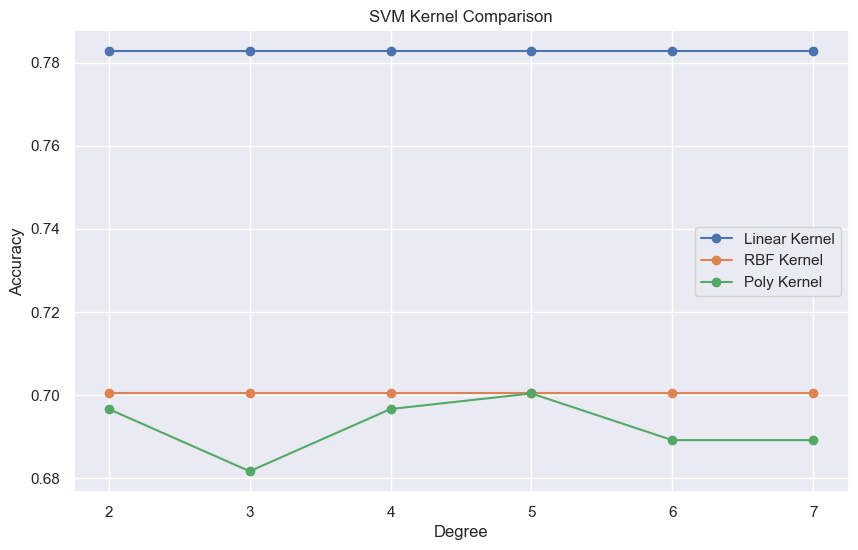

In [3]:
kernels = ['linear', 'rbf', 'poly']
degrees = list(range(2, 8))
accuracy_results_svm = []

for kernel in kernels:
    for degree in degrees:
        accuracy, _ = titanic_svm(kernel, degree, X_train, y_train, X_test, y_test)
        accuracy_results_svm.append((kernel, degree, accuracy))

linear_acc = [acc for kernel, degree, acc in accuracy_results_svm if kernel == 'linear']
rbf_acc = [acc for kernel, degree, acc in accuracy_results_svm if kernel == 'rbf']
poly_acc = [acc for kernel, degree, acc in accuracy_results_svm if kernel == 'poly']

plt.figure(figsize=(10, 6))
plt.plot(degrees, linear_acc, marker='o', label='Linear Kernel')
plt.plot(degrees, rbf_acc, marker='o', label='RBF Kernel')
plt.plot(degrees, poly_acc, marker='o', label='Poly Kernel')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Comparison')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


### Gaussian Naive Bayes

El Gaussian Naive Bayes es un algoritmo que se basa en el teorema de Bayes y supone independencia entre características. Aunque simplista, puede ser útil en la clasificación del Titanic debido a su eficacia en datos con múltiples características categóricas. Su enfoque rápido y adecuado para conjuntos pequeños, junto con su capacidad para manejar relaciones simples entre características, lo convierte en una opción viable para la predicción de supervivencia en este contexto.

En su caso decidimos no experimentar con sus parametros ya que involucran dar peso a variables en específicas. Únicamente se extraerá el accuracy obtenido con su clase default y se comparará con los demás modelos.

In [4]:
gnb_acc, gnb_matriz = titanic_gnb(X_train, y_train, X_test, y_test)
print('Accuracy de GNB: ', gnb_acc)

Accuracy de GNB:  0.8052434456928839


In [5]:
def metricas(matrix):
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, accuracy, f1_score

precision, recall, accuracy, f1_score = metricas(np.array(gnb_matriz))

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)

Precision: 0.8448275862068966
Recall: 0.8546511627906976
Accuracy: 0.8052434456928839
F1-Score: 0.8497109826589595


Los resultados de las métricas de evaluación muestran un rendimiento del modelo de clasificación. La precisión del modelo es del 83.2%, lo que significa que de todas las predicciones positivas realizadas por el modelo, el 83.2% son correctas. El recall, que es del 73.9%, indica la capacidad del modelo para identificar correctamente casos positivos, lo que sugiere que alrededor del 73.9% de los casos positivos reales se han identificado. La exactitud (accuracy) general es del 75.3%, lo que señala que el 75.3% de las predicciones totales realizadas por el modelo son correctas. Finalmente, el F1-Score es del 78.3%, un equilibrio entre la precisión y el recall, lo que implica que el modelo tiene un rendimiento general equilibrado en términos de identificación de positivos y negativos, así como de precisión en las predicciones positivas. 

En el presente análisis nos estamos enfocando en el accuracy, el cual para el Gaussian Naive Bayes resultó ser de 0.753.

### Random Forest

*Explicar por que probaremos de 3 a 13 depths*

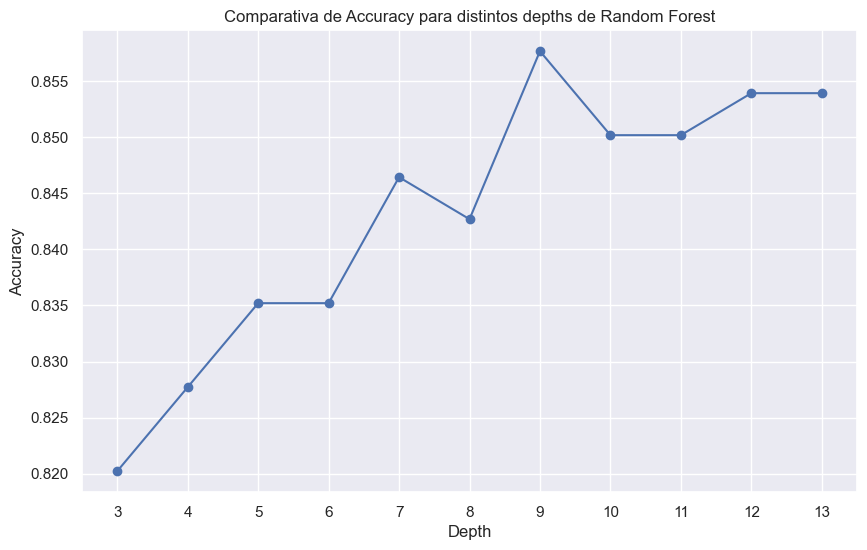

In [6]:
depth_values = list(range(3, 14))
accuracy_results_rf = []

for depth in depth_values:
    accuracy, _ = titanic_rf(depth, X_train, y_train, X_test, y_test)
    accuracy_results_rf.append((depth, accuracy))

depths, accuracies = zip(*accuracy_results_rf)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Comparativa de Accuracy para distintos depths de Random Forest')
plt.xticks(depths)
plt.grid(True)
plt.show()

El accuracy varía en el rango del 82% al 85.52%. Se observa un aumento en el accuracy a medida que la profundidad aumenta desde 3 hasta 9, alcanzando su punto más alto en 83.52% para la profundidad de 9. A partir de ahí, el accuracy tiende a disminuye.

### Logistic regression

La regresion logística lo que hace es meter una función linear como parametro dentro de una función sigmoide lo que la manda a un rango entre 0 y 1. Para este caso podemos utilizar directamente una fórmula estadistica para obtener los parametros óptimos pero tambien podríamos utilizar algun optimizador. 

In [7]:
log_acc, log_matriz = titanic_log(X_train, y_train, X_test, y_test)
print('Accuracy de Logisitc: ', log_acc)

Accuracy de Logisitc:  0.8052434456928839


In [8]:
precision, recall, accuracy, f1_score = metricas(np.array(log_matriz))

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)

Precision: 0.8370786516853933
Recall: 0.8662790697674418
Accuracy: 0.8052434456928839
F1-Score: 0.8514285714285714


### Comparativa

Los resultados de Accuracy obtenidos:

- SVM con kernel lineal obtuvo una precisión de 0.7827.
- SVM con kernel RBF logró una precisión de 0.6367.
- SVM con kernel polinómico de grado 5 alcanzó una precisión de 0.6554.
- Gaussian Naive Bayes mostró una precisión de 0.7528.
- Random Forest con una profundidad de 9 logró la mayor precisión, con un valor de 0.8352.
- Logistic Regression obtuvo una presisión de .

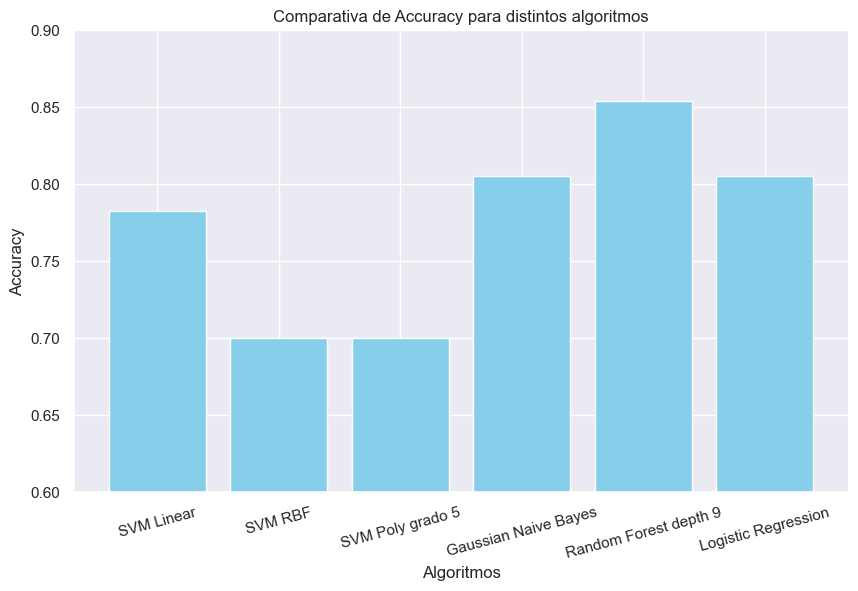

In [9]:
algorithms_c = ['SVM Linear', 'SVM RBF', 'SVM Poly grado 5', 'Gaussian Naive Bayes', 'Random Forest depth 9', 'Logistic Regression']
accuracies_c = [accuracy_results_svm[3][2], accuracy_results_svm[7][2], accuracy_results_svm[15][2], gnb_acc, accuracy_results_rf[9][1], log_acc]

plt.figure(figsize=(10, 6))
plt.bar(algorithms_c, accuracies_c, color='skyblue')
plt.xlabel('Algoritmos')
plt.ylabel('Accuracy')
plt.title('Comparativa de Accuracy para distintos algoritmos')
plt.ylim(0.6, 0.9)
plt.xticks(rotation=15)
plt.show()